Importing Required libraries

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import imutils as imt
import easyocr as esy

Read the image then Grayscale and blur

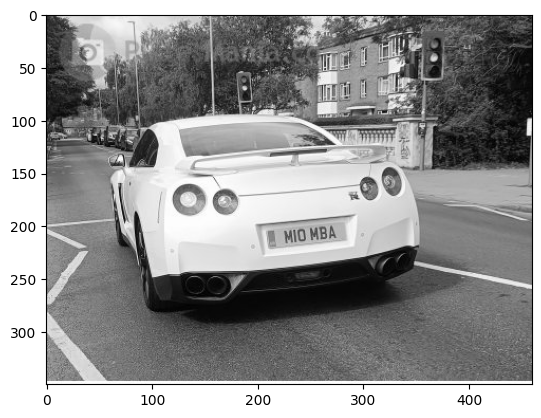

In [2]:
img=cv.imread('car2.jpg',)
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray,cv.COLOR_BGR2RGB))

Apply the filter and find the edges for localization

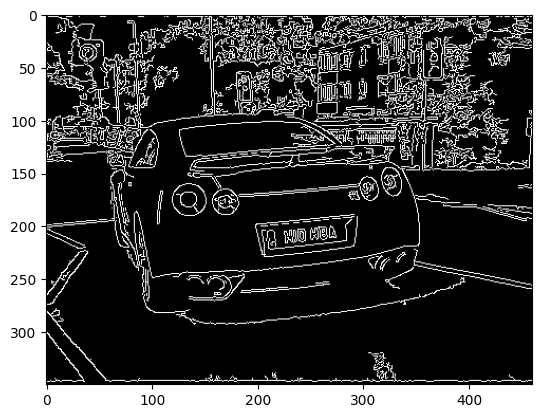

In [3]:
bfilter=cv.bilateralFilter(gray,11,17,17) #this is used to noise reduction
edge=cv.Canny(bfilter,30,200) # it will detect the edge
plt.imshow(cv.cvtColor(edge,cv.COLOR_BGR2RGB))

Find countours and applying mask

In [4]:
 keypoint=cv.findContours(edge.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
 contours=imt.grab_contours(keypoint)
 contours=sorted(contours,key=cv.contourArea,reverse=True)[:10]

In [5]:
location=None
for contour in contours:
    approx=cv.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break

In [6]:
location

array([[[273, 122]],

       [[240, 102]],

       [[126, 109]],

       [[132, 134]]], dtype=int32)

In [7]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv.drawContours(mask,[location],0,600,600)
new_img=cv.bitwise_and(img,img,mask=mask)

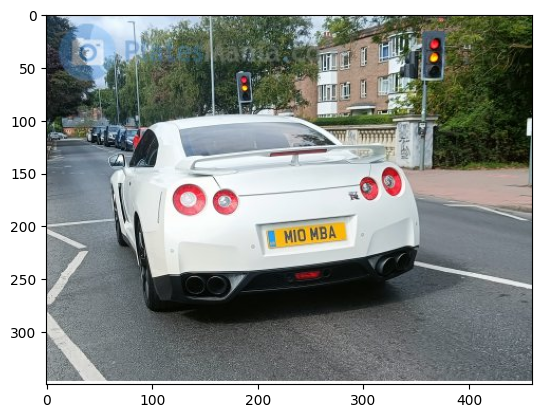

In [8]:
plt.imshow(cv.cvtColor(new_img,cv.COLOR_BGR2RGB))

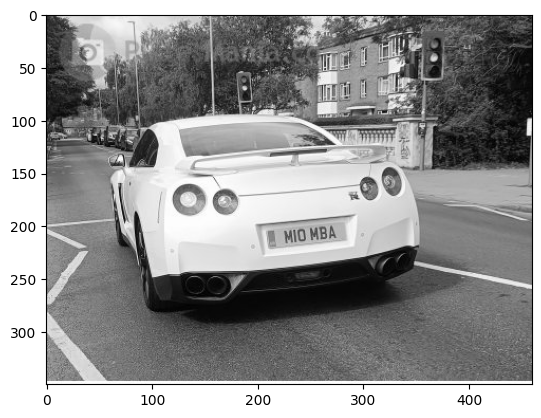

In [9]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray[x1:x2+1,y1:y2+1]
plt.imshow(cv.cvtColor(cropped_img,cv.COLOR_BGR2RGB))

Use Easyocr to read the text 

In [10]:
reader = esy.Reader(['en'])
result = reader.readtext(cropped_img)

# Print only the detected text (number plate)
for detection in result:
    print("Detected Number Plate:", detection[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Number Plate: MIO MBA


C:\Users\mones\AppData\Roaming\Python\Python310\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
